# Selección de cripto activos para una cartera de inversión

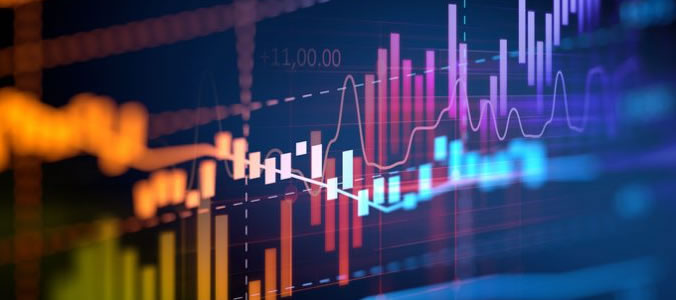

In [1]:
from IPython.display import Image
Image(filename='../imagen_tapa.jpg' ,  width= 1280)

# Trabajo Práctico 2 -  Análisis y Curación

## Introducción


A lo largo de este práctico continuaremos con la exploración del dataset iniciada en el práctio anterior, donde notamos algunas características propias de las series temporales. 
Además, vimos que no se trata de series estacionarias y en nuestro caso no apreciamos patrones de estacionalidad para la serie de tiempo de los precios.

En la siguiente notebook, se presentan las actividades relacionadas a Análisis y Curación. Buscamos identificar e implementar los pasos necesarios para la limpieza de la base de datos, así como también analizar cruces de datos con mayor profundidad. Para esto, los invito a chequear la siguiente [lista](https://dimewiki.worldbank.org/Checklist:_Data_Cleaning), donde se muestran una serie de puntos a tener en cuenta a la hora de tratar nuestros datos.

### Carga del dataset

Primero, comenzamos importando las librerías necesarias. Luego, cargaremos un único dataset, pero recuerden que en la carpeta **data** tenemos un dataset por cada activo disponible.

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv("../data/BTCUSDT.csv", index_col=0, parse_dates=True, dayfirst= True)
# Los argumentos index_col=0 y parse_dates se emplean para que la columna FECHA sea usada como índice

In [4]:
df.head()

,open,close,high,low,volume
2018-01-01 00:00:00,13715.65,13529.01,13715.65,13400.01,443.356199
2018-01-01 01:00:00,13528.99,13203.06,13595.89,13155.38,383.697006
2018-01-01 02:00:00,13203.00,13330.18,13418.43,13200.00,429.064572
2018-01-01 03:00:00,13330.26,13410.03,13611.27,13290.00,420.087030
2018-01-01 04:00:00,13434.98,13601.01,13623.29,13322.15,340.807329


In [5]:
df.tail()

,open,close,high,low,volume
2021-05-16 11:00:00,49574.98,49014.99,49640.28,48912.80,2464.233967
2021-05-16 12:00:00,49014.99,48622.62,49157.89,48550.63,2925.555177
2021-05-16 13:00:00,48618.14,48915.73,48999.10,48457.06,3053.929148
2021-05-16 14:00:00,48915.78,48284.32,49249.06,48036.00,3836.376897
2021-05-16 15:00:00,48284.32,48013.72,48331.45,47660.09,2315.780180


#### Variables

- __Fecha__: se la usa como índice del _pandasDataFrame_.

#### Activos ( con sus respectivos precios OHLC ):

Todos los activos están expresados en una misma moneda, *quote*, que en nuestro caso es USDT ( un token de USD )

- __BTCUSDT__
- __ETHUSDT__
- __BNBUSDT__
- __ADAUSDT__
- __DOTUSDT__
- __BCHUSDT__
- __LTCUSDT__
- __LINKUSDT__
- __ETCUSDT__
- __EOSUSDT__
- __XMRUSDT__
- __NEOUSDT__
- __AAVEUSDT__
- __MKRUSDT__
- __COMPUSDT__
- __DASHUSDT__


#### ¿Cuándo opera el mercado?

Este es un mercado que trabaja 24/7, es decir, está operando constantemente. En cada caso tenemos datos por hora (por lo tanto, una sesión equivale a una hora) de los diferentes precios **OHLC** de cada activo y el volumen, a saber:

- **OPEN :** precio al cual abre el activo, en la sesión.
- **HIGH :** mayor precio alcanzado por el activo en la sesión.
- **LOW :** menor precio alcanzado por el activo en la sesión.
- **CLOSE :** precio del activo al momento de cerrar la sesión. 
- **VOLUMEN :** cantidad del activo operado en la sesión.

Para conocer más sobre estos proyectos, pueden visitar la página [CoinMarketCap](https://coinmarketcap.com/). Allí encontrarán datos interesantes sobre cada par, su posición en el mercado, nacimiento de cada proyecto, entre otros.

# ¡Actividades!


Recuerden que la ciencia de datos es un proceso no lineal y continuo, es decir, si los datos requieren de mayor procesamiento para satisfacer las necesidades de algoritmos de machine learning, vamos a volver a la etapa inicial para, por ejemplo, crear nuevas features, tomar decisiones diferentes sobre valores faltantes o valores atípicos (outliers), descartar features, entre otras. ¡Manos a la obra!

Recomendación: Traten de crear funciones de manera de automatizar la mayor cantidad de pasos posibles. 

## Parte I 

- Indaguen sobre la existencia de valores faltantes. Diferencien entre datos perdidos e inexistentes. Seleccionen un activo y visualicen utilizando la librería Missingno ¿Si uno de los precios falta, también faltan los datos en las demás columnas? ¿Cuál creen que sería la mejor forma de tratarlos? ¿Por qué? Analicen formas de computarlos (por ejemplo, splines). 
**Para discutir:** ¿Cuáles podrían ser las razones de la falta de datos, si es que esto ocurre?


- ¿Hay índices repetidos? Resuelvan. 


- Para aprovechar en mayor medida los datos disponibles, analicen dividir los datos en dos posibles conjuntos de acuerdo a la disponibilidad de información según fechas.


- ¿Podría mejorarse la forma en la que está presentada la información? Recuerden que serán necesarios todos los precios de los activos para el cálculo de features. 


- Seleccionen un activo (y alguna de las columnas referidos a precios) y confeccionen un diagrama de dispersión entre el mismo y su valor retardado un período. Repita el mismo procedimiento con sus valores retardado 2, 3 y 4 períodos. 


- Grafiquen e interpreten las funciones de autocorrelación (ACF) y autocorrelación parcial (PACF), para el precio del activo elegido en el punto anterior. El siguiente [link](https://machinelearningmastery.com/gentle-introduction-autocorrelation-partial-autocorrelation/) puede ser útil para introducirlos en el tema.


## Parte II 

En esta instancia trabajaremos con algunos features extras que iremos generando a partir de los precios disponibles. Para ello los invito a investigar [talib](http://mrjbq7.github.io/ta-lib/doc_index.html), una de las librerías de python para análisis técnico. 

- Agreguen la serie de tasas de rendimiento para el precio close de cada activo. 


- Calculen las medias móviles de los precios tomando n periodos hacia atrás. 


- ¿Conocen algunos indicadores técnicos? Entre los más conocidos podemos mencionar: [RSI](https://admiralmarkets.com/es/education/articles/forex-indicators/como-sacar-beneficio-del-indicador-de-trading-rsi), [MADC](https://admiralmarkets.com/es/education/articles/forex-indicators/macd), [ADX](https://economipedia.com/definiciones/indicador-adx-average-directional-index.html), etc... Pueden construirlos o calcularlos a partir de la librería.


- Además, pueden crear indicadores personalizados, que ayudarán a que la predicción sea más precisa. Por ejemplo:


```
# Calculate 3 day moving average of close prices
df['S_3'] = df['close'].shift(1).rolling(window=3).mean()

# Calculate 15 day moving average of close prices
df['S_15'] = df['close'].shift(1).rolling(window=15).mean()

# Calculate 60 day moving average of close prices
df['S_60'] = df['close'].shift(1).rolling(window=60).mean()

# Calculate the correlation between close price and 3 day moving average
df['Corr'] = df['close'].shift(1).rolling(window=10).corr(df['S_3'].shift(1))

df['Std_U'] = df['high']-df['open']
df['Std_D'] = df['open']-df['low']

df['OD'] = df['open']-df['open'].shift(1)
df['OL'] = df['open']-df['close'].shift(1)
```
entre otros, S_3, S_15 y S_60 corresponde a las medias móviles de 3, 15 y 60 periodos. Además, se calcula la correlación entre los precios de cierre y la media móvil de 3 periodos  

**¿Qué roll cumple la función shift()? ¿Es necesario aplicarla en todos los features que calculamos?**


## Parte III

- Si por ejemplo, una característica tiene una varianza de un orden de magnitud mayor que la de las otras características, podría dominar la función objetivo y hacer que el estimador no pueda aprender de otras características correctamente como se esperaba. Para lograr esto se debe llevar a cabo un escalado o normalizado de datos. ¿Cuál es la diferencia? ¿Cuál elegirían aplicar?

## Parte IV - Opcional

- Para alguno/s de los activos, detecte las correlaciones entre los features generados utilizando la función Heatmap().




**¡Recuerde!** 

Nunca Modificar los Datos Crudos u Originales Al finalizar la limpieza, deberán guardar el dataset resultante, para asegurarse de no modificar los datos originales.

# Fecha de entrega

- __Versión preliminar: 1/7__ 

- __Versión final: 4/7__

# Condiciones de entrega

Realizar un informe en el cual se presenten los resultados y conclusiones del análisis desarrollado. El mismo debe estar pensado para un público técnico pero que desconoce los aspectos propios del problema a resolver. Dicho informe puede ser un notebook, a condición de que en el mismo se efectúe un análisis escrito suficientemente detallado de los resultados. 